<a href="https://colab.research.google.com/github/SKrior/DataMining/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Naufal Ramadhani Adiyatma

NPM : 23082010110

Judul Project: ANALISIS DAN PREDIKSI ATTRITION KARYAWAN MENGGUNAKAN PERBANDINGAN ALGORITMA LOGISTIC REGRESSION, DECISION TREE, DAN RANDOM FOREST

Judul Dataset: IBM HR Analytics Employee Attrition & Performance

**Setup Awal**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42


**Pengambilan Dataset melalui API**

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

print("Mengambil dataset melalui Kaggle API...")

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "pavansubhasht/ibm-hr-analytics-attrition-dataset",
    "WA_Fn-UseC_-HR-Employee-Attrition.csv"
)

print("Dataset berhasil dimuat melalui Kaggle API")
print("Ukuran dataset:", df.shape)

df.to_csv("IBM_HR_Analytics_from_API.csv", index=False)


Mengambil dataset melalui Kaggle API...
Using Colab cache for faster access to the 'ibm-hr-analytics-attrition-dataset' dataset.
Dataset berhasil dimuat melalui Kaggle API
Ukuran dataset: (1470, 35)


**Profiling Data Awal**

In [ ]:
# Profiling Data Awal
print("INFO DATASET:")
df.info()
print("\nSTATISTIK DESKRIPTIF:")
df.describe()

INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel  

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Melihat statistik dasar dari kolom-kolom kategorikal
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


**Preprocessing Awal**

In [ ]:
# Cek missing value
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Dari hasil output di atas jumlah missing value pada tiap kolom adalah 0. Hal ini membuktikan bahwa dataset ini tidak terdapat missing value.

In [ ]:
# Cek Duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

# Jika ingin lihat data yang duplikat
if duplicate_count > 0:
    print(df[df.duplicated()])
else:
    print("Tidak ada data duplikat.")


Jumlah data duplikat: 0
Tidak ada data duplikat.


Dari hasil output di atas jumlah duplikat dataset adalah 0. Hal ini membuktikan bahwa dataset ini tidak terdapat duplikat.


In [ ]:
# Cek Inkonsistensi
print('\nCEK INKONSISTENSI DATA PADA KOLOM KATEGORIKAL:')
for column in df.select_dtypes(include='object').columns:
    print(f"\nKolom '{column}':")
    print(df[column].unique())
    print(f"Jumlah nilai unik: {df[column].nunique()}")


CEK INKONSISTENSI DATA PADA KOLOM KATEGORIKAL:

Kolom 'Attrition':
['Yes' 'No']
Jumlah nilai unik: 2

Kolom 'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Jumlah nilai unik: 3

Kolom 'Department':
['Sales' 'Research & Development' 'Human Resources']
Jumlah nilai unik: 3

Kolom 'EducationField':
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Jumlah nilai unik: 6

Kolom 'Gender':
['Female' 'Male']
Jumlah nilai unik: 2

Kolom 'JobRole':
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Jumlah nilai unik: 9

Kolom 'MaritalStatus':
['Single' 'Married' 'Divorced']
Jumlah nilai unik: 3

Kolom 'Over18':
['Y']
Jumlah nilai unik: 1

Kolom 'OverTime':
['Yes' 'No']
Jumlah nilai unik: 2


Berdasarkan hasil pemeriksaan dataset pada tiap kolom kategorikal sudah sesuai dengan yang ada pada deskripsi dataset IBM HR Analytics di Kaggle. Sehingga, hal ini membuktikan bahwa dataset ini tidak mengalami inkonsisten.

=== Statistik Deskriptif Dataset ===
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932

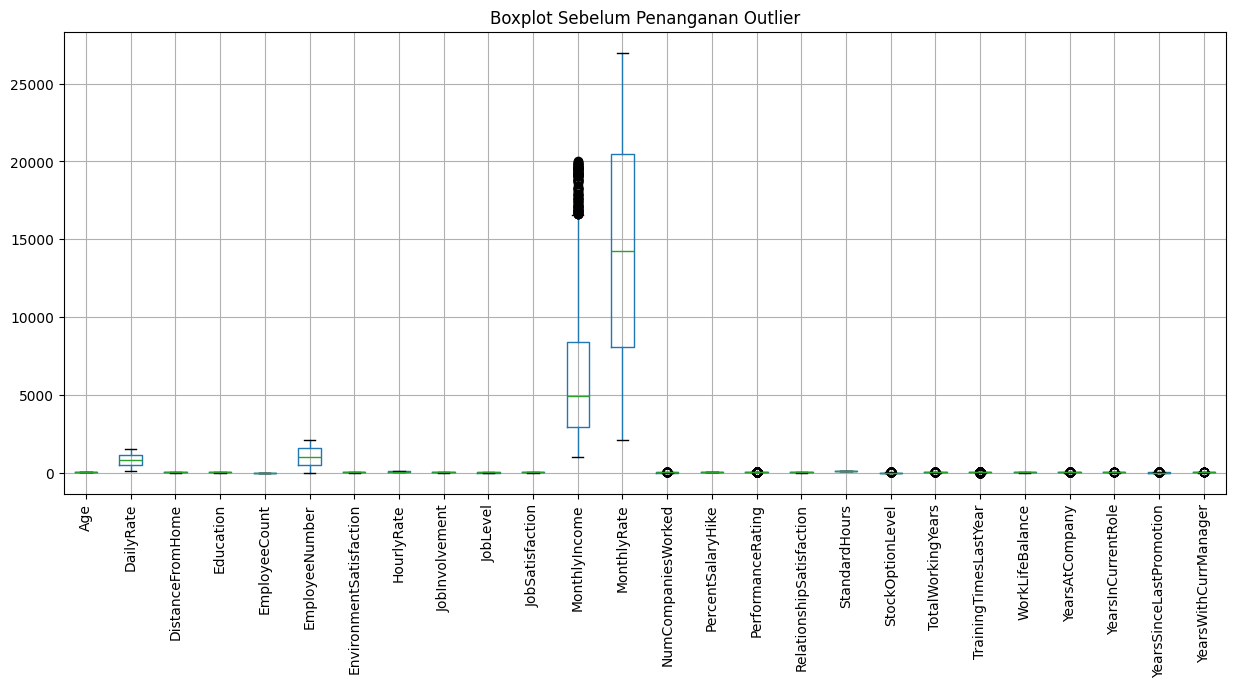

In [ ]:
# Cek Outlier
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns #mengambil kolom numerik bertipe integer dan pecahan
print("=== Statistik Deskriptif Dataset ===")
print(df[numeric_cols].describe()) #menghitung statistik deskriptif (count, mean, std, min, 25%, 50%, 75%, dan max)

numeric_cols = df.select_dtypes(include=[np.number]).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Jumlah Outlier'])
outlier_df = outlier_df[outlier_df['Jumlah Outlier'] > 0].sort_values(by='Jumlah Outlier', ascending=False)

print("🔹 CEK OUTLIER (metode IQR):")
if outlier_df.empty:
    print("Tidak ada outlier signifikan (atau semua dalam rentang normal).")
else:
    print(outlier_df)

plt.figure(figsize=(15,6))
df[numeric_cols].boxplot() #visualisasi boxplot
plt.xticks(rotation=90)
plt.title("Boxplot Sebelum Penanganan Outlier")
plt.show()

Dari output di atas dapat di lihat dengan jelas bahwa terdapat outlier pada kolom TrainingTimesLastYear, PerformanceRating, MonthlyIncome, YearsSinceLastPromotion, YearsAtCompany, StockOptionLevel, TotalWorkingYears, NumCompaniesWorked, YearsInCurrentRole, dan
YearsWithCurrManager.

Dari pengecekan dataset di atas, dataset ini hanya mengalami outlier pada beberapa kolom. Agar mengakuratkan analisis, outlier ini harus di tangani terlebih dahulu.


Dataset awal: (1470, 35)
Dataset setelah outlier ditangani: (1470, 35)


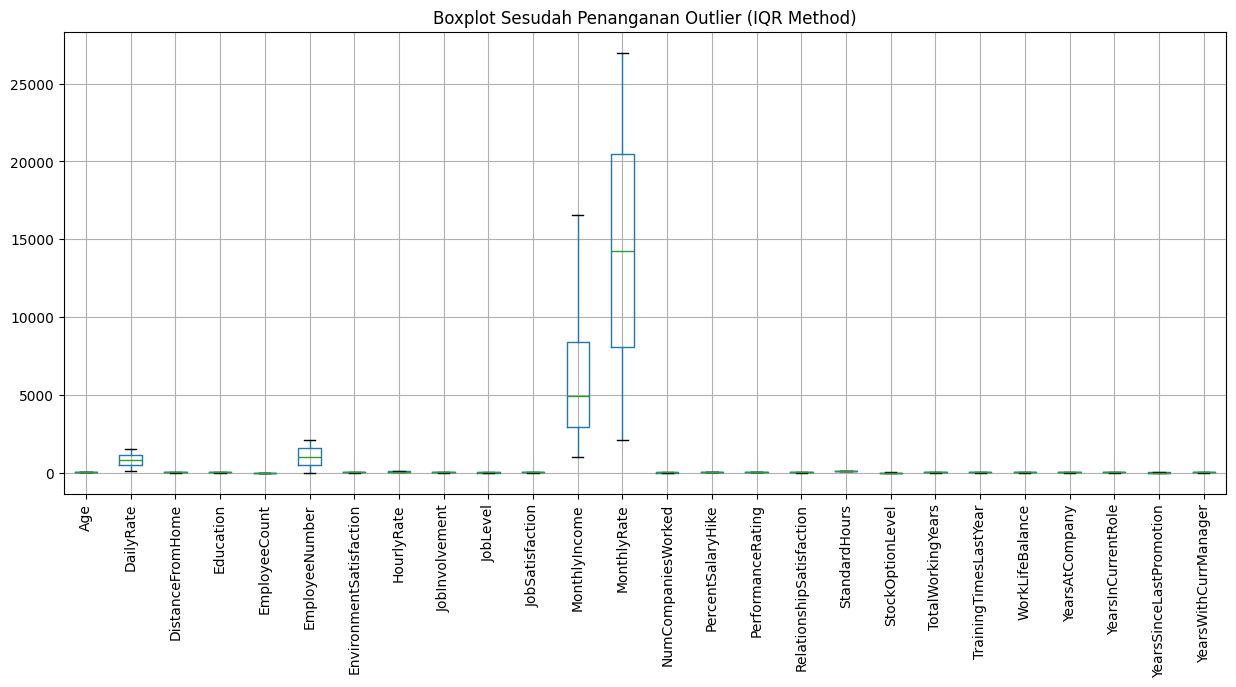

In [ ]:
# Penanganan Outlier

df_clean = df.copy() #membuat salinan dataset

#Ambil kolom yang bentuk numerik
numeric_cols = df_clean.select_dtypes(include=['int64']).columns

#looping semua kolom numerik
for col in numeric_cols:
  Q1 = df_clean[col].quantile(0.25)
  Q3 = df_clean[col].quantile(0.75)
  IQR = Q3 - Q1

  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  df_clean[col] = df_clean[col].clip(lower,upper)

print("\nDataset awal:", df.shape)
print("Dataset setelah outlier ditangani:", df_clean.shape)

plt.figure(figsize=(15,6))
df_clean[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot Sesudah Penanganan Outlier (IQR Method)")
plt.show()

Penanganan outlier menggunakan Metode IQR, dari visualisasi boxplot dapat dilihat bahwa sudah tidak ada yang outlier.

## $\textbf{Eksplorasi Data (EDA)}$

In [ ]:
df_clean.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.764966,11.103061,2.710884,2.761224,6.617687,4.207823,1.922789,4.107483
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.782312,7.303828,1.037954,0.706476,4.989788,3.555335,2.478222,3.517487
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,2.500000,28.500000,4.500000,4.000000,18.000000,14.500000,7.500000,14.500000


In [ ]:
# Melihat statistik dasar dari kolom-kolom kategorikal
df_clean.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


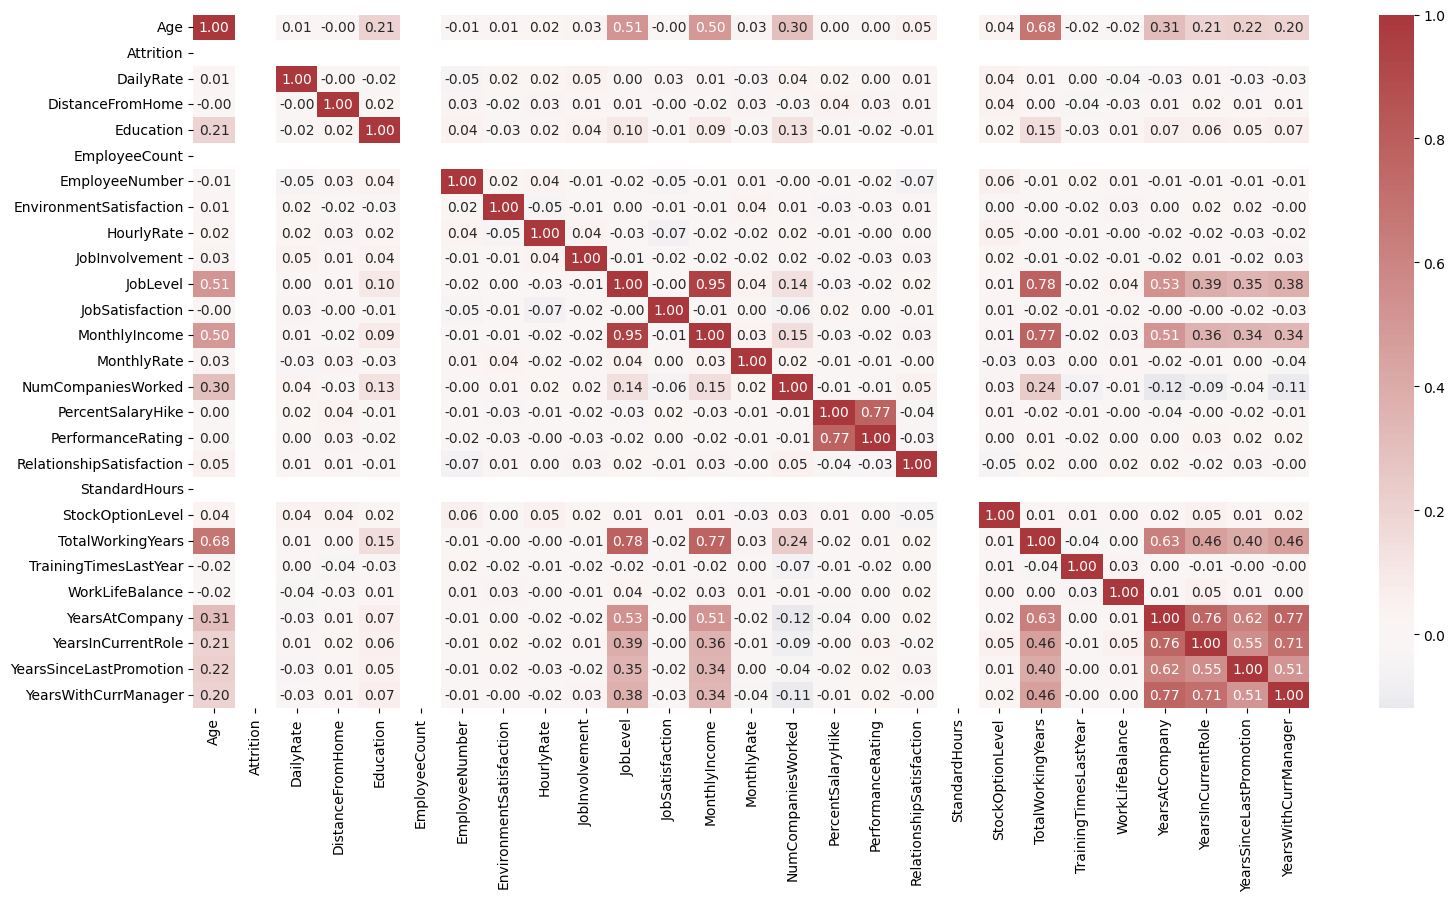

In [50]:
# Uji Korelasi
# Create a copy for correlation to avoid modifying the original df for subsequent steps
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})
corr = df_corr.corr(numeric_only = True)

plt.figure(figsize = (18, 9))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'vlag', center = 0);

Dari uji korelasi di atas terhadap kolom target Attrition terdapat beberapa kolom yang memeliki korelasi negatif kurang dari - 0.1, beberapa kolom diantaranya dalah Age, Education, JobInvolvement, JobLevel, JobSatisfaction, Mounthlyincome, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole dan YearsWithCurrManager.

Data Preparation

In [51]:
df_model = df_clean.copy() # Use df_clean as the base for modeling

# Encoding fitur kategorikal
encoder = LabelEncoder()
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = encoder.fit_transform(df_model[col])

**Train Test dan Scaling**

In [52]:
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

# Scaling (penting untuk Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model 1: Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)


Logistic Regression Accuracy: 0.8741496598639455


Model 2: Decission Tree

In [ ]:
dt_model = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    max_depth=6
)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)


Decision Tree Accuracy: 0.8231292517006803


Model 3: Random Forest

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=RANDOM_STATE
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.8333333333333334


Perbandingan Model

In [ ]:
comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest"
    ],
    "Accuracy": [
        acc_lr,
        acc_dt,
        acc_rf
    ]
})

comparison


,Model,Accuracy
0,Logistic Regression,0.874150
1,Decision Tree,0.823129
2,Random Forest,0.833333


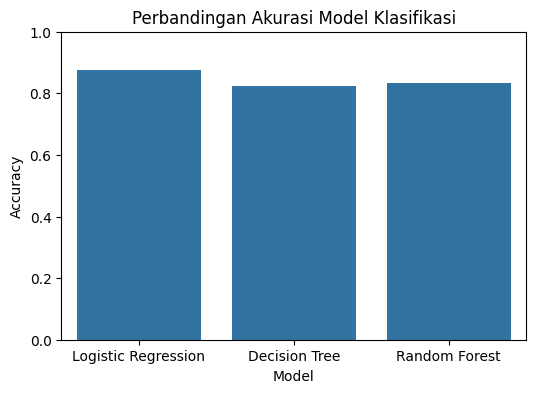

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=comparison, x="Model", y="Accuracy")
plt.title("Perbandingan Akurasi Model Klasifikasi")
plt.ylim(0,1)
plt.show()


Kesimpulan:
Berdasarkan hasil evaluasi dan perbandingan model, dapat disimpulkan bahwa Logistic Regression merupakan model terbaik pada proyek ini karena menghasilkan akurasi tertinggi dibandingkan dengan dua model lainnya. Hal ini menunjukkan bahwa hubungan antara fitur-fitur yang digunakan dengan status attrition cenderung bersifat cukup linear dan dapat ditangkap dengan baik oleh model statistik sederhana.